## **Venta de seguros de auto con Machine Learning**

**Naren Castellon**

**4 de Mayo 2021**

<img src="imagen/seguro_auto.jpg" width="500" height="250">

<font size=3.5 > <p style="color:purple">
    Usaremos los siguientes modelos Machine Learning para clasificación 

1. Regresión Logistica
2. KNN
3. Support Vector Machine
4. Árbol de decisión

Se requiere instalar

`pip install imbalanced-learn`

<font size=5 > <p style="color:purple"> 1. **Importamos las librerias**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Balanceo de Datos
# ==============================================================================
from imblearn.over_sampling import SMOTE


# Ocultar advertencia - Warning
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

<font size=5 > <p style="color:purple">**2. Importamos los Datos**

Este es un conjunto de datos IBM Watson Analytics. Este conjunto de datos nos brinda información sobre sus clientes. Puede predecir su comportamiento para retener a sus clientes. Además podemos analizar todos los datos relevantes de los clientes y desarrollar programas en la que podamos buscar retener la mayor cantidad de clientes, de manera que también podamos ir comprendiento la demografía de los clientes y su comportamiento de compra.

Vamos a utilizar análisis predictivo para analizar los clientes más importante y rentables y como estos interactúan. Realizaremos acciones específicas para aumentar la respuesta, la retención y el crecimiento rentable de los clientes

In [67]:
data = pd.read_csv("./data/data_poliza_seguros.csv")

In [68]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       8099 non-null   object        
 1   State                          8099 non-null   object        
 2   Customer Lifetime Value        8099 non-null   float64       
 3   Response                       8099 non-null   object        
 4   Coverage                       8099 non-null   object        
 5   Education                      8099 non-null   object        
 6   Effective To Date              8099 non-null   datetime64[ns]
 7   EmploymentStatus               8099 non-null   object        
 8   Gender                         8099 non-null   object        
 9   Income                         8099 non-null   int64         
 10  Location Code                  8099 non-null   object        
 11  Marital Status   

<font size=5 > <p style="color:purple"> **3. Exploratory Data Analysis (EDA)**

In [69]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [70]:
data.shape

(8099, 24)

In [73]:
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [72]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [75]:
data.describe()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8099.000000,8099,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,7981.271398,2011-01-29 18:09:33.404124160,37843.544265,93.140758,15.071490,48.147549,0.389184,2.963823,431.464401
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3974.498315,2011-01-15 00:00:00,0.000000,68.000000,6.000000,25.000000,0.000000,1.000000,269.484578
50%,5780.182197,2011-01-29 00:00:00,34430.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.167471
75%,8963.294993,2011-02-13 00:00:00,62459.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6847.287340,NaN,30370.556860,34.381153,10.086656,27.818744,0.914152,2.390357,286.706233


Nuestro conjunto de datos tiene 9134 clientes con información sobres sus ingresos, educación, sexo, residencia, etc (income, education, gender,residence). Cada cliente posee un autómovil y se le ofrece 4 tipos difentes de seguros de automovil. El target de esa base de datos es la variable **Response**. La respuesta (Response) puede ser "Si"- el cliente acepta la oferta, y "No" el cliente no acepta la oferta.

Podemos verificar si tenemos valores pérdidos

In [77]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

<font size='3' font>Tenemos 0 valores perdidos, lo cual es muy bueno.
Ahora hagamos EDA con algunos gráficos geniales :) Primero veremos cómo se distribuyen los cargos de acuerdo con factores dados

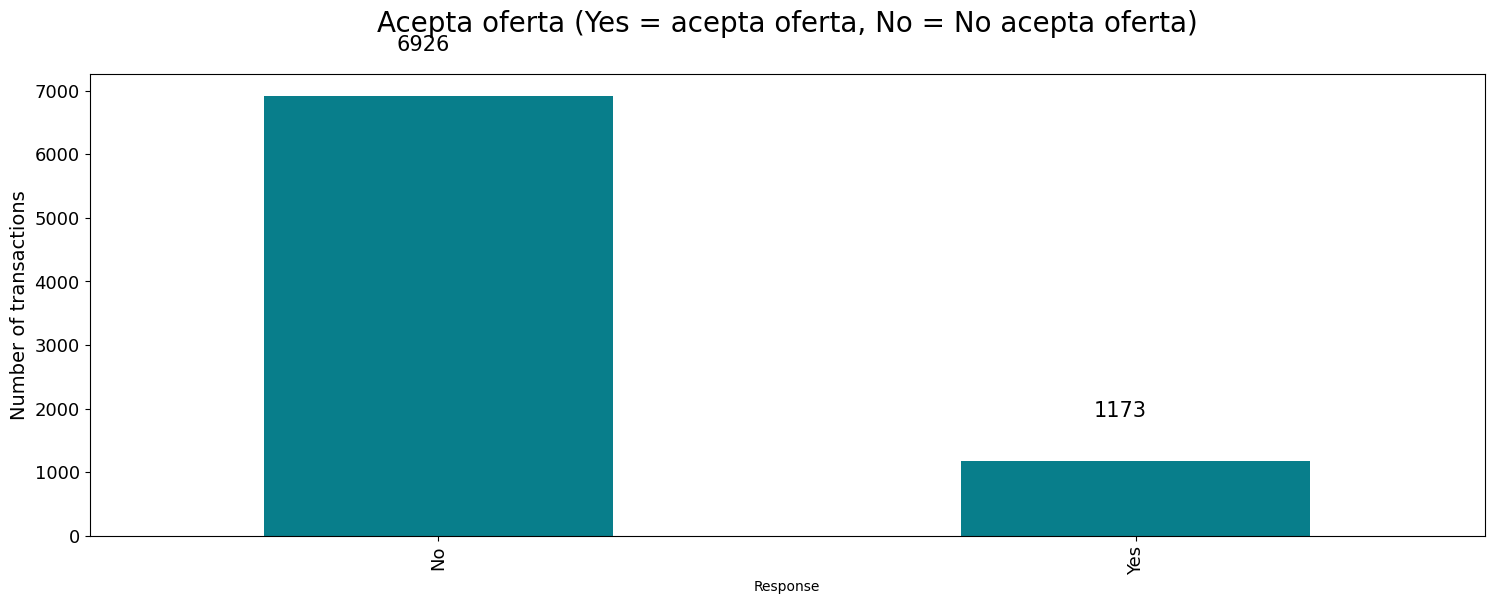

In [78]:
ax = data['Response'].value_counts().plot(kind='bar', figsize=(18, 6), fontsize=13, color='#087E8B')
ax.set_title('Acepta oferta (Yes = acepta oferta, No = No acepta oferta)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

Vamos a visualizar que tipo de relación se tiene con los estado o la region al momento de poder 

In [79]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<Axes: xlabel='Response', ylabel='count'>

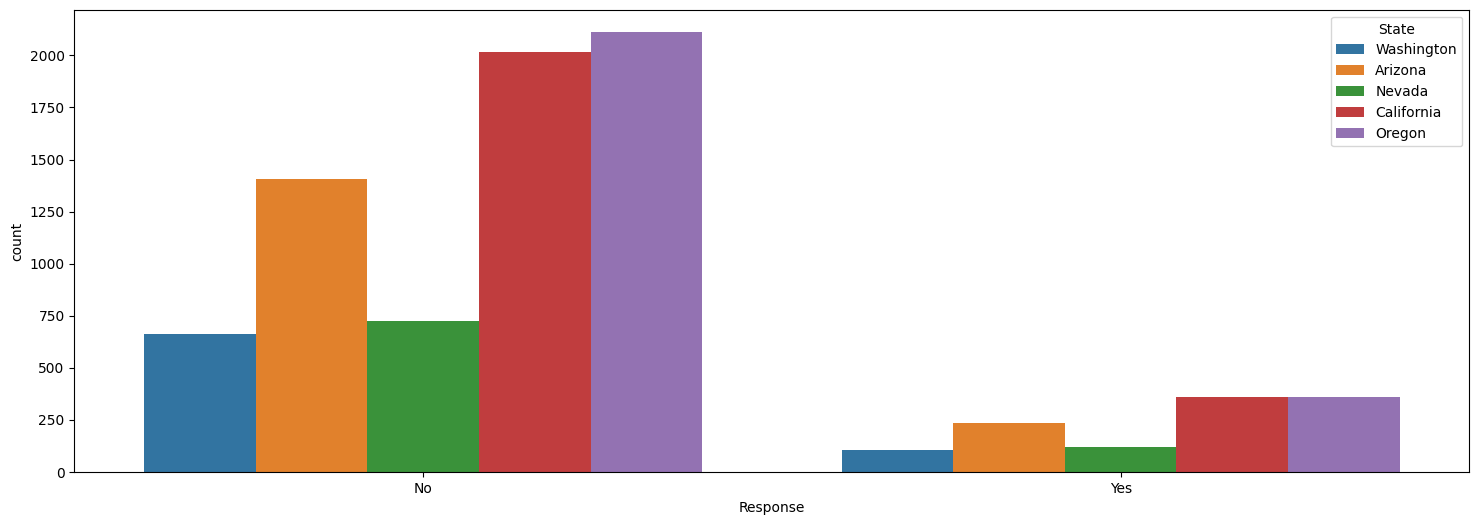

In [80]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.countplot(x = "Response", hue="State", data = data)

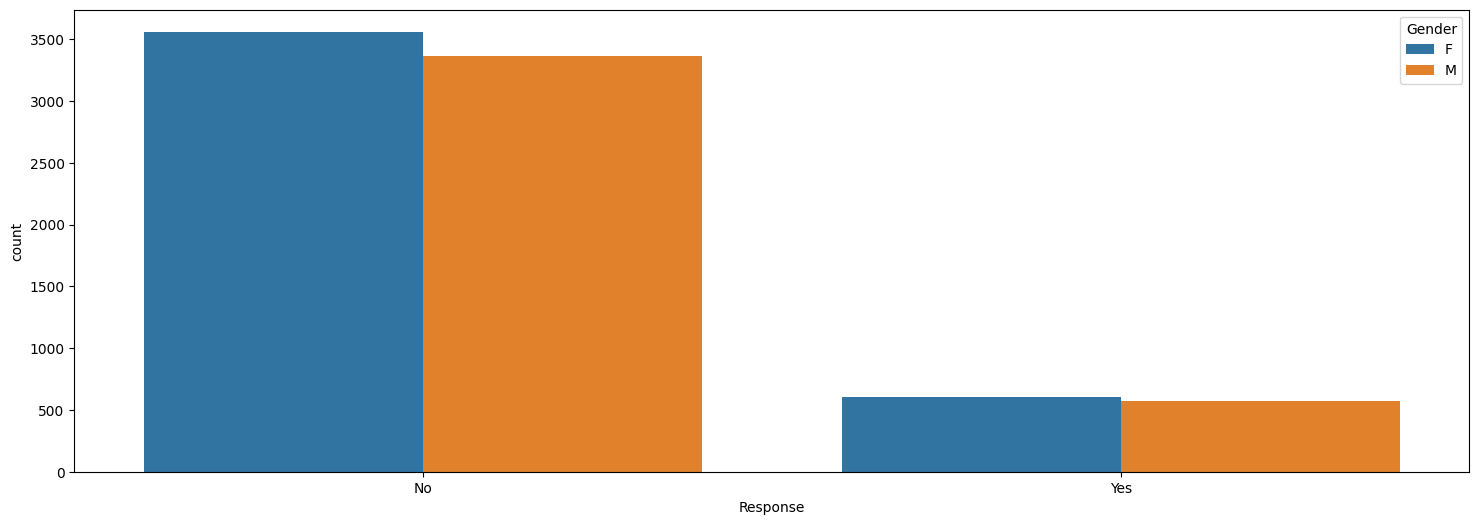

In [81]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.countplot(x = "Response", hue="Gender", data = data);

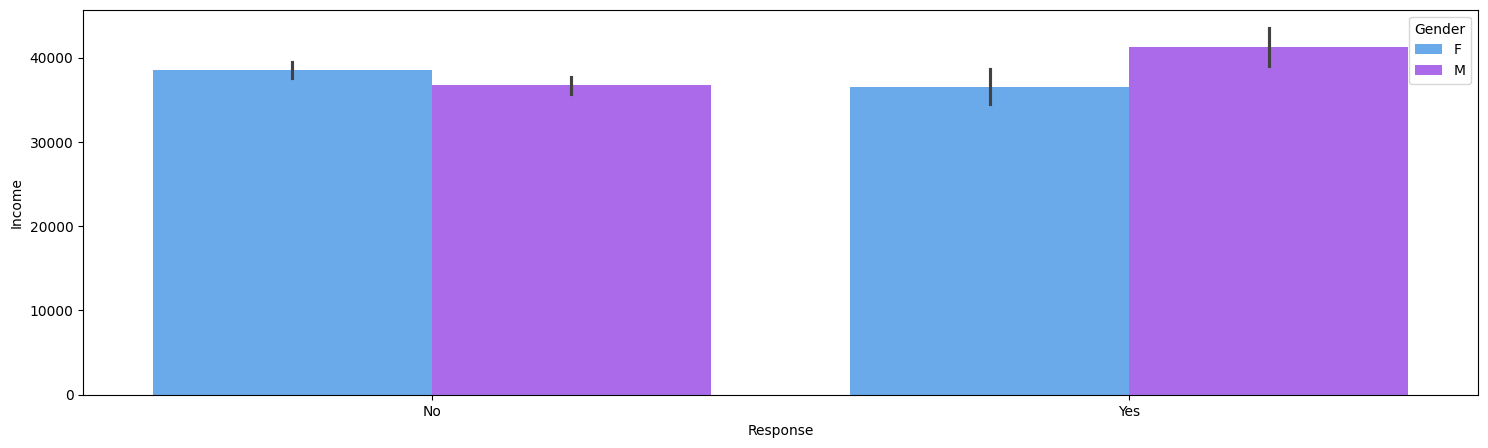

In [82]:
f, ax = plt.subplots(1, 1, figsize=(18, 5))
ax = sns.barplot(x='Response', y='Income', hue='Gender', data=data, palette='cool')

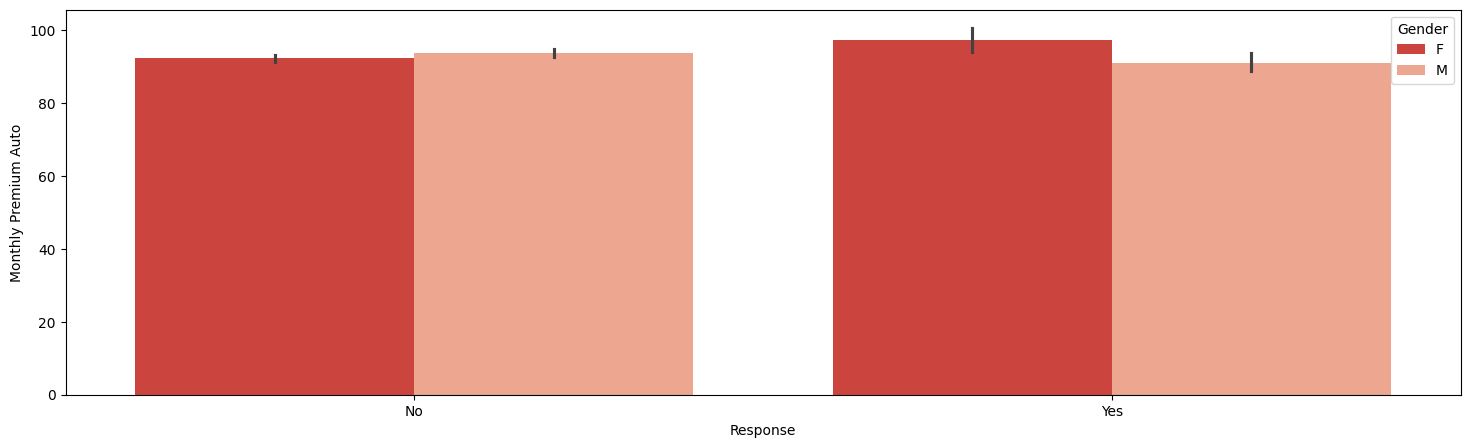

In [83]:
f, ax = plt.subplots(1, 1, figsize=(18, 5))
ax = sns.barplot(x='Response', y='Monthly Premium Auto', hue='Gender', data=data, palette='Reds_r')

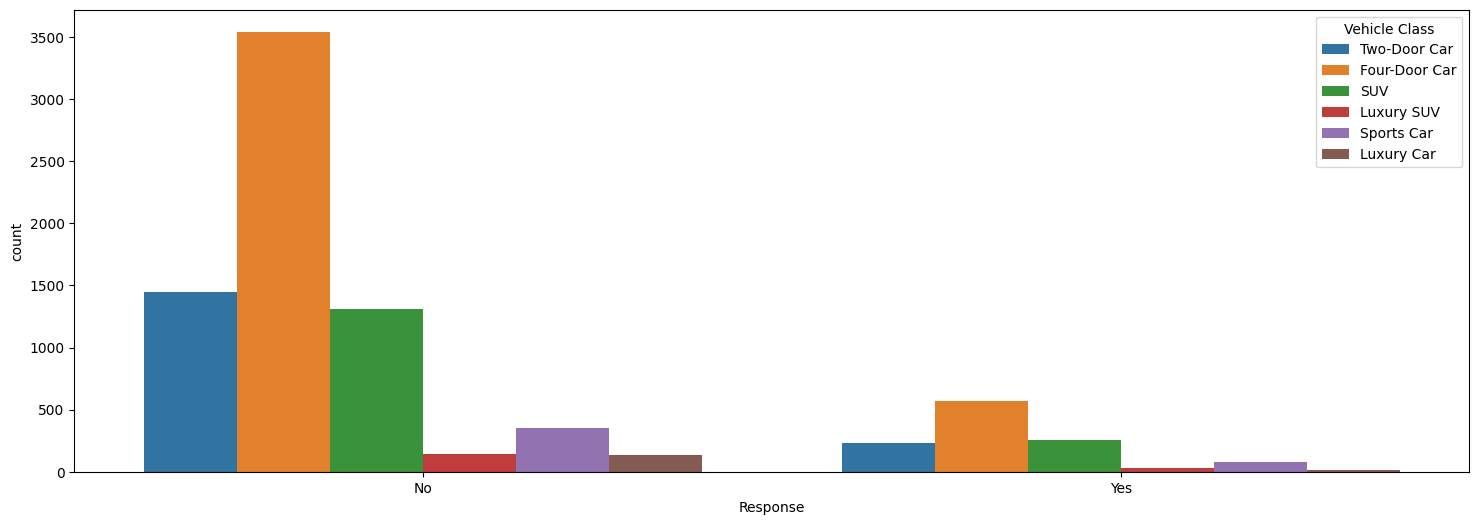

In [84]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.countplot(x = "Response", hue="Vehicle Class", data = data);


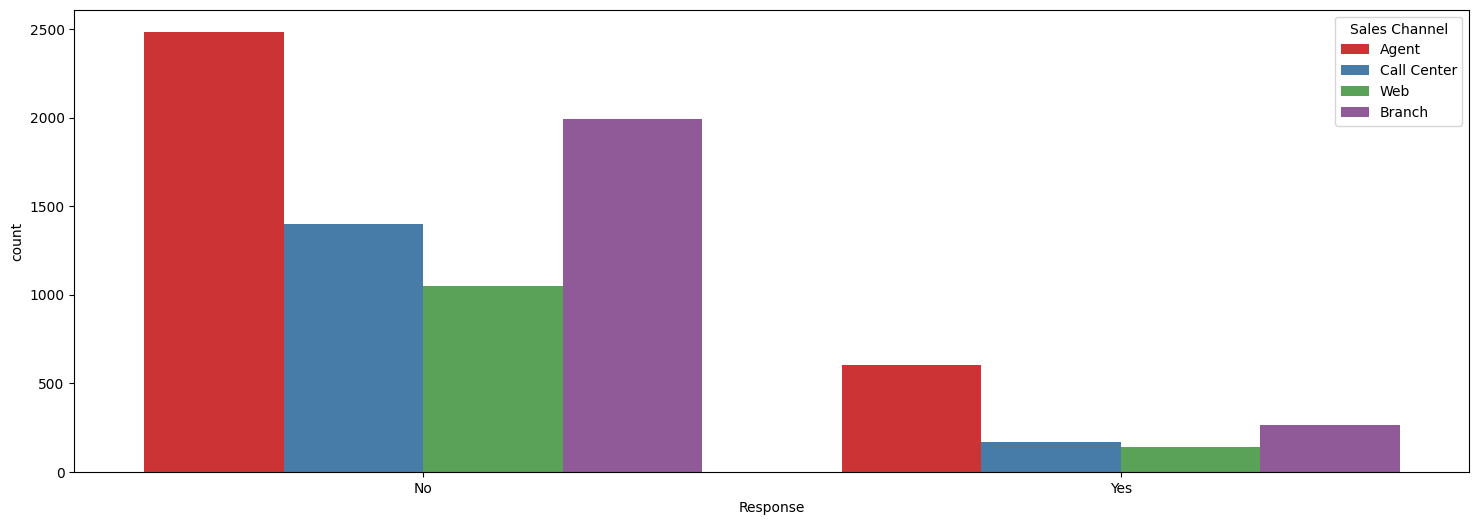

In [85]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.countplot(x = "Response", hue="Sales Channel", data = data,palette='Set1');


In [86]:
data.Response.value_counts()

Response
No     6926
Yes    1173
Name: count, dtype: int64

sólo  1308 de los clientes han aceptado la oferta.

In [87]:
print("Solo",round((len(data[(data.Response == "Yes")])/len(data.Response)*100),2),"%","de nuestros clientes aceptan una oferta realizada por su Equipo de Ventas.")

Solo 14.48 % de nuestros clientes aceptan una oferta realizada por su Equipo de Ventas.


In [88]:
data.groupby("Sales Channel").agg({"Response":"count"})

,Response
Sales Channel,
Agent,3087
Branch,2255
Call Center,1567
Web,1190


La mayoría de las ofertas fueron realizadas por agentes (3477 ofertas) y la que tuvo menos oferta fue a través del sitio web.

In [89]:
channel = list(data["Sales Channel"].unique())
for i in channel:
    output = len(data[(data["Sales Channel"] == i) & 
                      (data["Response"] == "Yes")]) /len(data[(data["Sales Channel"] == i)])
    print(round((output * 100),2), "% de ofertas a través del Canal de Ventas", i, "fueron aceptados.")

19.5 % de ofertas a través del Canal de Ventas Agent fueron aceptados.
10.85 % de ofertas a través del Canal de Ventas Call Center fueron aceptados.
11.68 % de ofertas a través del Canal de Ventas Web fueron aceptados.
11.62 % de ofertas a través del Canal de Ventas Branch fueron aceptados.


In [90]:
objects = ["State","Response","Coverage","Education","EmploymentStatus",
           "Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel",
           "Vehicle Class","Vehicle Size"]

for obj in objects:
    print(data[obj].value_counts())

State
Oregon        2475
California    2376
Arizona       1640
Nevada         842
Washington     766
Name: count, dtype: int64
Response
No     6926
Yes    1173
Name: count, dtype: int64
Coverage
Basic       4931
Extended    2440
Premium      728
Name: count, dtype: int64
Education
Bachelor                2430
College                 2369
High School or Below    2339
Master                   648
Doctor                   313
Name: count, dtype: int64
EmploymentStatus
Employed         5079
Unemployed       2041
Medical Leave     376
Disabled          357
Retired           246
Name: count, dtype: int64
Gender
F    4164
M    3935
Name: count, dtype: int64
Location Code
Suburban    5098
Rural       1598
Urban       1403
Name: count, dtype: int64
Marital Status
Married     4728
Single      2153
Divorced    1218
Name: count, dtype: int64
Policy Type
Personal Auto     6053
Corporate Auto    1682
Special Auto       364
Name: count, dtype: int64
Policy
Personal L3     3140
Personal L2     1789
Pe

**Results**

Todas las características categoricas están bien distribuidas, así que las guardare  y las codificaremos en datos numéricos

Algunas variables que tenemos en nuestro conjunto de datos no son tan importantes, por ejemplo el customer, policy es la misma que policy type, la fecha tampoco es importante, así que procederemos a eliminarlas


Los datos no están equilibrados con respecto a la variable respuesta.

<font size=5 > <p style="color:purple"> **4. Data Analysis**

In [93]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [91]:
data = data.drop(columns={"Customer","Policy", "Effective To Date"})

In [92]:
# Creamos una lista de las variables categoricas

data_categorial = data.select_dtypes(include=["object"])
categories = list(data_categorial.columns)
categories

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [94]:
# Convertimos las variables categoricas en numéricas empleando LabelEncoder
lb = LabelEncoder()

for i in categories:
    data[i] = lb.fit_transform(data[i])

In [95]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,32,5,0,1,0,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,13,42,0,8,1,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,18,38,0,2,1,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,18,65,0,7,0,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,12,44,0,1,1,0,0,138.130879,0,1


Creamos la matriz de correlación

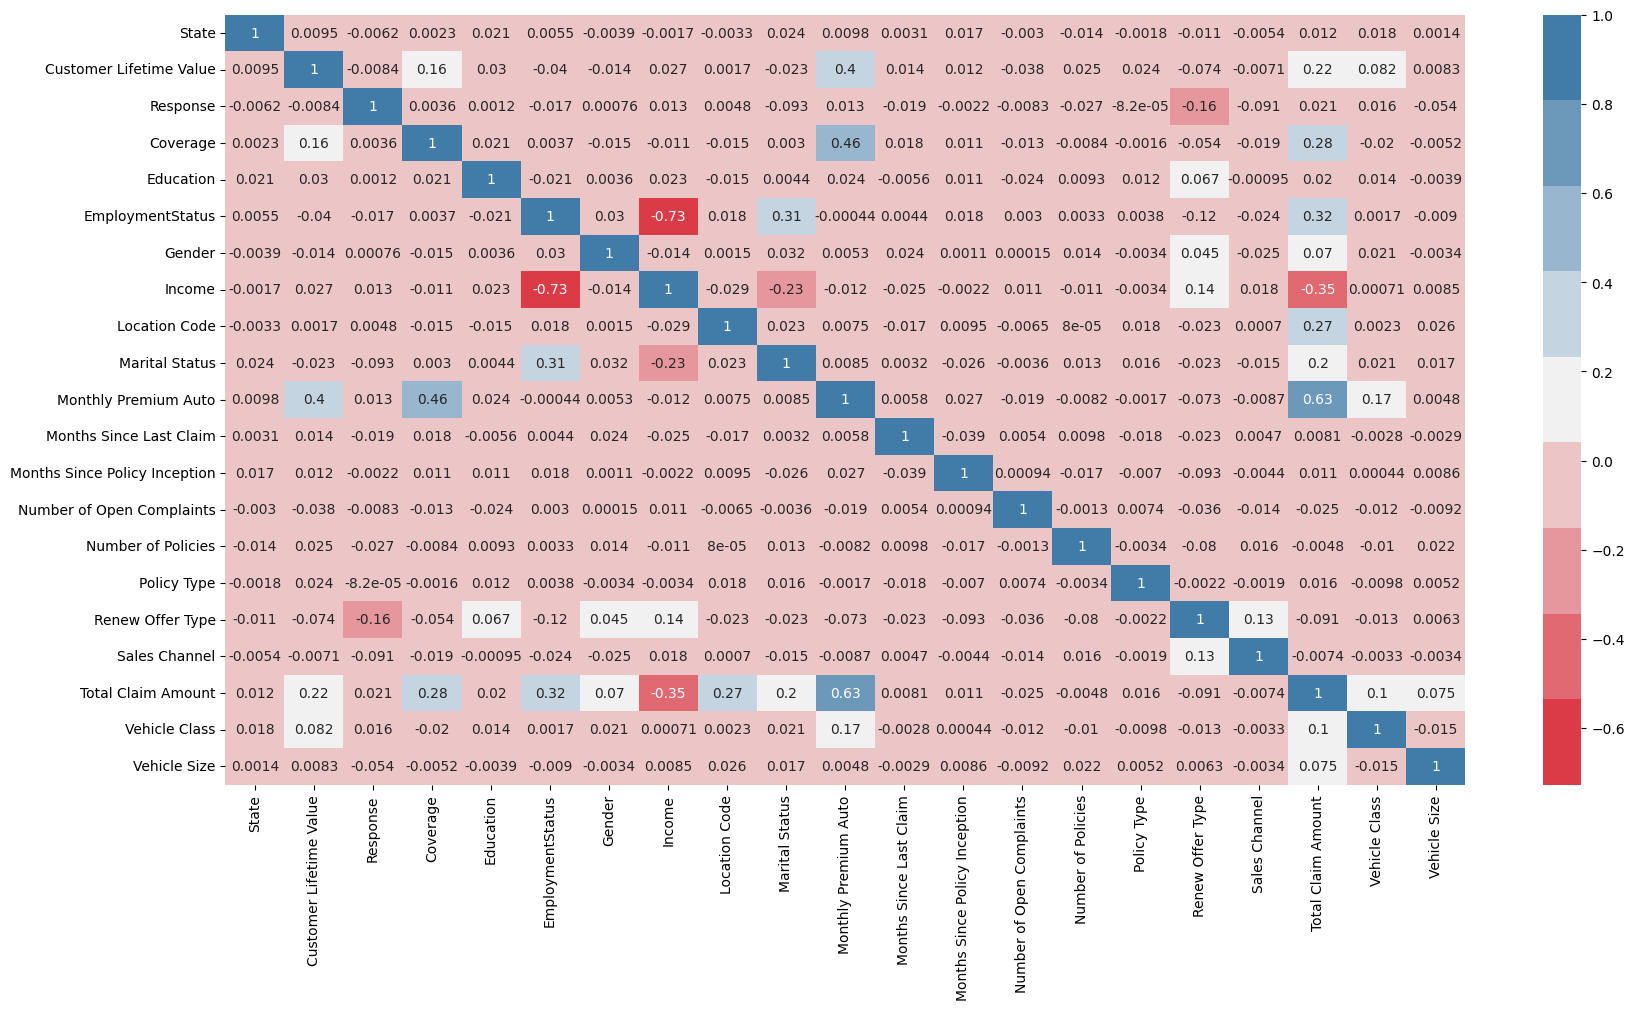

In [96]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(data.corr(), annot=True, cmap=cmap)

<font size=5 > <p style="color:purple"> **5. Supervised Machine Learning para datos no balanceados**

Empezaremos con la predicción de la respuesta de los futuros clientes. Para esto debemos encontrar un modelo adecuado. Dados que nuestros datos tiene un objetivo que se separa en **Si** y **No**, podemos usar la clasificación de los modelos aprendizaje automático (Machine Learning), iniciaremos usando los siguientes modelos:

* Logistic Regression
* KNeighbours Classifier
* Support Vector Machine
* Decision Tree

In [100]:
# Variable objetivo o Target o Variable Dependiente
y = data["Response"]

In [101]:
# Variables independiente 
X = data.drop(["Response"], axis=1)
X

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,384.811147,5,1
1,0,6979.535903,1,0,4,0,0,1,2,94,13,42,0,8,1,2,0,1131.464935,0,1
2,2,12887.431650,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,566.472247,5,1
3,1,7645.861827,0,0,4,1,0,1,1,106,18,65,0,7,0,0,2,529.881344,3,1
4,4,2813.692575,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,3,9726.551005,1,4,1,0,72236,1,1,80,2,29,0,2,1,1,2,518.064733,0,1
8095,1,8099.466122,0,0,4,0,0,2,0,112,19,42,0,6,1,0,1,438.812143,3,1
8096,3,5020.473987,0,1,1,1,67890,2,1,63,23,26,0,3,1,0,0,174.088540,0,1
8097,0,4834.710493,0,1,1,0,38713,1,0,66,31,69,4,6,1,1,2,316.800000,0,1


## `Division de Datos para entrenamiento y Prueba`

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

## **1. Regresión Logistica**

In [127]:
lr = LogisticRegression()
# initialize the model (=lr)

# Entrenar el modelo
model_logistica =lr.fit(X_train,y_train)

# prediccion del modelo
y_pred = model_logistica.predict(X_test)

acc_test = lr.score(X_test,y_test)*100
# comapring the test with the data

print("Logistic Regression Test Accuracy", round(acc_test, 2),"%")

Logistic Regression Test Accuracy 85.31 %


In [125]:
acc_train = model_logistica.score(X_train,y_train)*100
# comapring the test with the data

print("Logistic Regression Test Accuracy", round(acc_train, 2),"%")

Logistic Regression Test Accuracy 85.57 %


## **Resultado**

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred))
print (classification_report(y_test,y_pred))
print (accuracy_score(y_test, y_pred))

[[1382    0]
 [ 238    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1382
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1620
   macro avg       0.43      0.50      0.46      1620
weighted avg       0.73      0.85      0.79      1620

0.8530864197530864


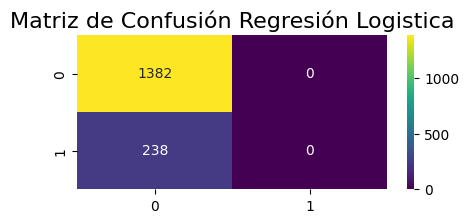

In [129]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

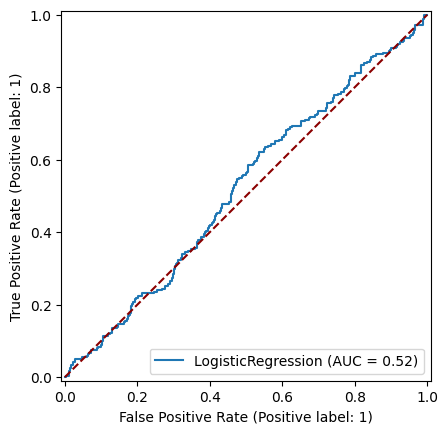

In [130]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_logistica , X_test, y_test)
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

## **2. Modelo K Neighbors**

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
# prediction = knn.predict(x_test)

y_pred_knn = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print("2 neighbors KNN Score: ",round(acc,2),"%")

2 neighbors KNN Score:  97.41 %


In [146]:
y_pred_knn = knn.predict(X_test)

acc_train = knn.score(X_train, y_train)*100
print("Accuracy - Train 2 neighbors KNN Score: ",round(acc_train,2),"%")

Accuracy - Train 2 neighbors KNN Score:  99.97 %


In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_knn))
print (classification_report(y_test,y_pred_knn))
print (accuracy_score(y_test, y_pred_knn))

[[1346   36]
 [   6  232]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1382
           1       0.87      0.97      0.92       238

    accuracy                           0.97      1620
   macro avg       0.93      0.97      0.95      1620
weighted avg       0.98      0.97      0.97      1620

0.9740740740740741


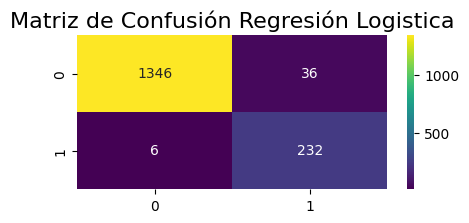

In [148]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

## **3 Support Vector Machine**

In [149]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred_svc=svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print("SVM Algorithm Test Accuracy", round(acc, 2),"%")

SVM Algorithm Test Accuracy 85.31 %


In [150]:
y_pred_svc=svm.predict(X_test)
acc = svm.score(X_train,y_train)*100
print("Accuracy - Train SVM", round(acc, 2),"%")

Accuracy - Train SVM 85.57 %


In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_svc))
print (classification_report(y_test,y_pred_svc))
print (accuracy_score(y_test, y_pred_svc))

[[1382    0]
 [ 238    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1382
           1       0.00      0.00      0.00       238

    accuracy                           0.85      1620
   macro avg       0.43      0.50      0.46      1620
weighted avg       0.73      0.85      0.79      1620

0.8530864197530864


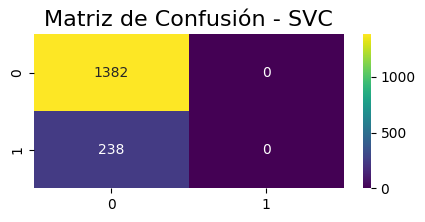

In [154]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión - SVC", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

## **4. Árbol de decisión**

In [155]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#predicion
y_pred_dtc = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print("Decision Tree Test Accuracy", round(acc, 2),"%")

Decision Tree Test Accuracy 96.48 %


In [156]:
#predicion
y_pred_dtc = dtc.predict(X_test)

acc_train = dtc.score(X_train, y_train)*100
print("Decision Tree Test Accuracy", round(acc_train, 2),"%")

Decision Tree Test Accuracy 100.0 %


In [157]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_dtc))
print (classification_report(y_test,y_pred_dtc))
print (accuracy_score(y_test, y_pred_dtc))

[[1326   56]
 [   1  237]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1382
           1       0.81      1.00      0.89       238

    accuracy                           0.96      1620
   macro avg       0.90      0.98      0.94      1620
weighted avg       0.97      0.96      0.97      1620

0.9648148148148148


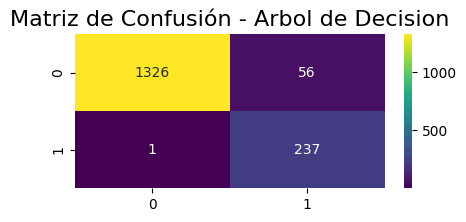

In [159]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión - Arbol de Decision", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred_dtc), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

**Resultados**

Los modelos tienen una precisión realmente alta, el modelo de Support Vector Machine parece ser la mejor decisión para usar con más del 99% de precisión 

Pero esto se debe a que los datos que hemos trabajado hasta el momento no estan balanceados. La variable response tiene como respuesta con "No"  un porcentaje del 86%, por lo que el modelo no es de mucha utilidad y no da una visión muy precisa de los datos.

<font size=5 > <p style="color:purple">**6. Supervised Machine Learning para datos balanceados**

En esta ocasión para tener un mejor resultado de nuestro datos, podemos reducir la muestra de nuestro Target. En manera particular esto podría ser mejor que el sobremuestreo, por lo que no le damos demasiado peso a un objetivo determinado.

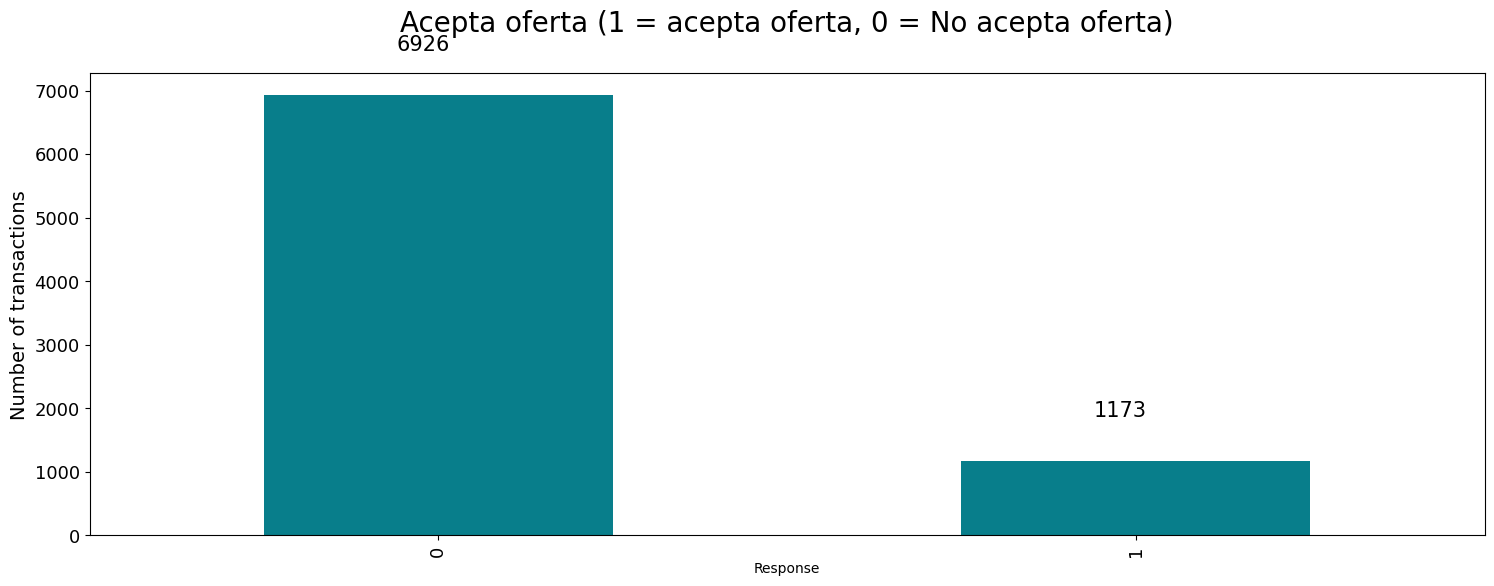

In [160]:
ax = data['Response'].value_counts().plot(kind='bar', figsize=(18, 6), fontsize=13, color='#087E8B')
ax.set_title('Acepta oferta (1 = acepta oferta, 0 = No acepta oferta)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [162]:
#Downsampling:

#1. Test-Train Split!!
# concatenate our training data back together

X_down = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes

no_effect = X_down[X_down.Response==0]
effect = X_down[X_down.Response==1]

# downsample majority

no_effect_downsampled = resample(no_effect,
                               replace = False, # sample without replacement
                               n_samples = len(effect), # match minority n
                               random_state = 27) # reproducible results

# combine minority and downsampled majority

downsampled = pd.concat([no_effect_downsampled, effect])

# checking counts

downsampled.Response.value_counts()

Response
0    935
1    935
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

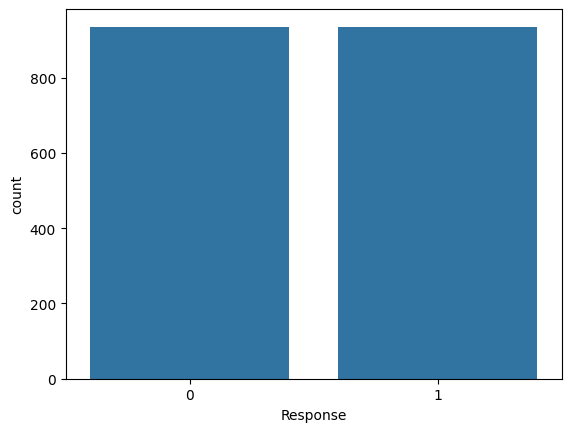

In [163]:
sns.countplot(x = downsampled['Response'], data = downsampled)

In [164]:
downsampled.shape

(1870, 21)

In [165]:
y_train_down = downsampled.Response

In [166]:
X_train_down = downsampled.drop(["Response"], axis = 1)

## **REGRESIÓN  LOGISTICA**

In [171]:
lr = LogisticRegression()
# initialize the model (=lr)

lr.fit(X_train_down,y_train_down)
#fit the model to the train set

y_pred1 = lr.predict(X_test)

acc = lr.score(X_test,y_test)*100
# comapring the test with the data

print("Prediction",y_pred[:5])
print("Logistic Regression Test Accuracy", round(acc, 2),"%")

Prediction [0 0 0 0 0]
Logistic Regression Test Accuracy 59.75 %


In [172]:
acc_train = lr.score(X_train,y_train)*100
# comapring the test with the data

print("Logistic Regression Test Accuracy", round(acc_train, 2),"%")

Logistic Regression Test Accuracy 60.53 %


La precisión es muy mala, intentemos con otro modelo.

In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred1))
print (classification_report(y_test,y_pred1))
print (accuracy_score(y_test, y_pred1))

[[850 532]
 [120 118]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.72      1382
           1       0.18      0.50      0.27       238

    accuracy                           0.60      1620
   macro avg       0.53      0.56      0.49      1620
weighted avg       0.77      0.60      0.66      1620

0.5975308641975309


## **K-NEAREST NEIGHBOUR** 

In [173]:
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors = n_neighbors)  # n_neighbors means k
knn.fit(X_train_down, y_train_down)

y_pred2 = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100

print("Prediction:", y_pred[:5])
print(n_neighbors,"neighbors KNN Score: ",round(acc,2),"%")

Prediction: [0 0 0 0 0]
2 neighbors KNN Score:  85.49 %


In [174]:
acc_train = knn.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",round(acc_train,2),"%")
acc_test = knn.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",round(acc_test,2),"%")



The accuracy score for the training data is:  85.34 %
The accuracy score for the test data is:  85.49 %


In [175]:
cv_results = cross_val_score(knn, X_train_down,y_train_down, cv = 5)
cv_results

array([0.88502674, 0.85561497, 0.85561497, 0.89037433, 0.89304813])

Accuracy is better and also the data is continuous.

In [176]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred2))
print (classification_report(y_test,y_pred2))
print (accuracy_score(y_test, y_pred2))

[[1147  235]
 [   0  238]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1382
           1       0.50      1.00      0.67       238

    accuracy                           0.85      1620
   macro avg       0.75      0.91      0.79      1620
weighted avg       0.93      0.85      0.87      1620

0.8549382716049383


6.3. **DECISION TREE**

In [177]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_down, y_train_down)

y_pred_dtc3 = dtc.predict(X_test)

acc_dtc = dtc.score(X_test, y_test)*100

print("Prediction", y_pred_dtc[:5])
print("Decision Tree Test Accuracy", round(acc_dtc, 2),"%")

Prediction [0 1 0 0 1]
Decision Tree Test Accuracy 86.6 %


In [178]:
acc_train = dtc.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",round(acc_train,2),"%")
acc_test = dtc.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",round(acc_test,2),"%")

The accuracy score for the training data is:  89.2 %
The accuracy score for the test data is:  86.6 %


In [179]:
cv_results = cross_val_score(dtc, X_train_down,y_train_down, cv = 5)
cv_results

array([0.89304813, 0.90374332, 0.89839572, 0.89037433, 0.88770053])

In [180]:
cnf_matrix = confusion_matrix(y_test, y_pred_dtc3)
cnf_matrix

array([[1166,  216],
       [   1,  237]])

In [181]:
dtc_recall = recall_score(y_test, y_pred_dtc3)
dtc_recall

0.9957983193277311

In [182]:
271/(271+4)

0.9854545454545455

In [183]:
dtc_precision = precision_score(y_test,y_pred_dtc3)
dtc_precision

0.5231788079470199

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test,y_pred_dtc3))
print (classification_report(y_test,y_pred_dtc3))
print (accuracy_score(y_test, y_pred_dtc3))

[[1166  216]
 [   1  237]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1382
           1       0.52      1.00      0.69       238

    accuracy                           0.87      1620
   macro avg       0.76      0.92      0.80      1620
weighted avg       0.93      0.87      0.88      1620

0.8660493827160494


El Árbol de decisión la mejor precisión. El Recall es muy alto-Eso es bueno. Por tanto el modelo que puede predecir bastante bien que un cliente no aceptase la oferta es el modelo de Árbol de Decisión. En este caso como ya conocemos los clientes que no debes invertir, así que nos concentrariamos en los clientes que aceptan una oferta.

In [185]:
# Importar RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [186]:
# In this case we use RandomOverSampler technique to transfrom data
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train_down, y_train_down)

In [193]:
from time import time

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_val_predict, train_test_split, StratifiedKFold
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix,  roc_curve, auc, accuracy_score, precision_score, classification_report, roc_auc_score

#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Ocultar advertencia - Warning
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

**Stratified K-Folds cross-validator** (Validador cruzado de K-Folds estratificado).

Proporciona índices de entrenamiento / prueba para dividir datos en conjuntos de entrenamiento / prueba.

Este objeto de validación cruzada es una variación de KFold que devuelve pliegues estratificados. Los pliegues se realizan conservando el porcentaje de muestras de cada clase.

In [208]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

models = {'LogisticRegression': LogisticRegression(random_state=0),
        'RidgeClassifier' : RidgeClassifier(random_state=0),
        'LGBMClassifier' : LGBMClassifier(random_state=0),
        'KNeighborsClassifier' : KNeighborsClassifier(),
        #'XGBClassifier' : XGBClassifier(random_state=0,eval_metric = 'auc'),
        'RandomForestClassifier': RandomForestClassifier(random_state=0,  ),
        "Arbol de Decisión":DecisionTreeClassifier(random_state=0)
          }
        

accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []
times = []

for model_name in models:
    
    start = time()

    models[model_name].fit(X_resampled, y_resampled)
    
    end = time()
    
    accuracy_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'accuracy', cv = skf, n_jobs = -1)
    precision_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'precision', cv = skf, n_jobs = -1)
    recall_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'recall', cv = skf, n_jobs = -1)
    f1_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'f1', cv = skf, n_jobs = -1)
    roc_auc_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'roc_auc', cv = skf, n_jobs = -1)

    accuracy.append(np.mean(accuracy_))
    precision.append(np.mean(precision_))
    recall.append(np.mean(recall_))
    f1.append(np.mean(f1_))
    roc_auc.append(np.mean(roc_auc_))
    times.append(end-start)
    
accuracy_test = pd.concat([pd.DataFrame([models.keys()]).T.rename(columns = {0:'models'}),
           pd.DataFrame({'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1, 'roc_auc':roc_auc, 'times':times})],
          axis=1)

accuracy_test

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6926, number of negative: 6926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 13852, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 1105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1058
[LightGBM] 

,models,accuracy,precision,recall,f1,roc_auc,times
0,LogisticRegression,0.853086,0.000000,0.000000,0.000000,0.532641,0.225585
1,RidgeClassifier,0.853086,0.000000,0.000000,0.000000,0.652467,0.009287
2,LGBMClassifier,0.919136,0.835007,0.562323,0.665935,0.855337,0.139660
3,KNeighborsClassifier,0.841975,0.409026,0.196897,0.262933,0.688976,0.002548
4,RandomForestClassifier,0.927160,0.982593,0.511968,0.664548,0.860840,0.891498
5,Arbol de Decisión,0.860494,0.519077,0.608422,0.557414,0.756080,0.056408


In [207]:
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

models = {'LogisticRegression': LogisticRegression(random_state=0),
        'RidgeClassifier' : RidgeClassifier(random_state=0),
        'LGBMClassifier' : LGBMClassifier(random_state=0),
        'KNeighborsClassifier' : KNeighborsClassifier(),
        #'XGBClassifier' : XGBClassifier(random_state=0,eval_metric = 'auc'),
        'RandomForestClassifier': RandomForestClassifier(random_state=0,  ),
        "Arbol de Decisión":DecisionTreeClassifier(random_state=0)
          }
        

accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []
times = []

for model_name in models:
    
    start = time()

    models[model_name].fit(X_train, y_train)
    
    end = time()
    
    accuracy_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'accuracy', cv = skf, n_jobs = -1)
    precision_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'precision', cv = skf, n_jobs = -1)
    recall_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'recall', cv = skf, n_jobs = -1)
    f1_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'f1', cv = skf, n_jobs = -1)
    roc_auc_ = cross_val_score(models[model_name], X_test, y_test, scoring = 'roc_auc', cv = skf, n_jobs = -1)

    accuracy.append(np.mean(accuracy_))
    precision.append(np.mean(precision_))
    recall.append(np.mean(recall_))
    f1.append(np.mean(f1_))
    roc_auc.append(np.mean(roc_auc_))
    times.append(end-start)
    
pd.concat([pd.DataFrame([models.keys()]).T.rename(columns = {0:'models'}),
           pd.DataFrame({'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1, 'roc_auc':roc_auc, 'times':times})],
          axis=1)

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 935, number of negative: 5544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1112
[LightGBM] [Info] Number of data points in the train set: 6479, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144312 -> initscore=-1.779925
[LightGBM] [Info] Start training from score -1.779925
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 1105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

,models,accuracy,precision,recall,f1,roc_auc,times
0,LogisticRegression,0.853086,0.000000,0.000000,0.000000,0.532641,0.223551
1,RidgeClassifier,0.853086,0.000000,0.000000,0.000000,0.652467,0.006959
2,LGBMClassifier,0.919136,0.835007,0.562323,0.665935,0.855337,0.085624
3,KNeighborsClassifier,0.841975,0.409026,0.196897,0.262933,0.688976,0.001918
4,RandomForestClassifier,0.927160,0.982593,0.511968,0.664548,0.860840,0.519406
5,Arbol de Decisión,0.860494,0.519077,0.608422,0.557414,0.756080,0.027432
